# Predictive Analysis for Diabetes Detection among Patients

#### The project aims at detecting if the patient being studied has diabetes or not. 

#### If the patient does not have diabetes then it also suggests if the person is prone to developing diabetes in the long run. 

#### This is achieved by means of various pysiological and pathological experiments from samples collected from the patients.

### Dataset Description

#### The information was gathered from Iraqi society, as well as information from the lab at Medical City Hospital 

#### and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital). 

#### To create the diabetes dataset, data from patient files were obtained, extracted, and entered into the database.

#### Medical information and laboratory analysis make up the data.

## Target Variable


##### In our domain of study the target variable which is the ‘Class’ column in the diabetes dataset is a categorical variable. 

##### The class variable is mainly composed of 3 different values according to our dataset. The classes can be described as follows:

●	Y - Diabetic Patient

●	N - Non- Diabetic Patient

●	P - Predict Diabetic Patient 


## Classification

#### Our research problem is a classification problem , So we decided to perform the different suprvised classification algoithms.

#### Our research problem is a multiclass classification

# Classification 

# Importing Libraries

#### All the neccesary Python libraries are imported We need to install set of libraries  to run this code.

#### which we did part of our home works we haven't installed them again instead imported them directly

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn import svm
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

#### The Diabetes Dataset is loaded into the data frame using pandas which is stored from in our GitHub Repository.

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/SravaniRVS/DATA602/main/Project/Dataset.csv')

#### Top 5 rows of the Dataframe are displayed

In [3]:
#Displaying top 5 rows in the dataset
df.head(5)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender'>

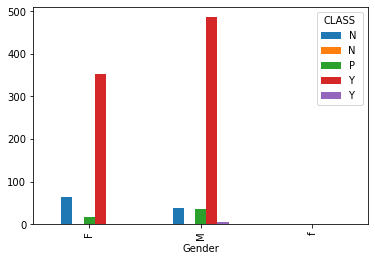

In [4]:
#Output Classes Frequency plot
df_gb = df.groupby(['Gender','CLASS']).size().unstack(level=1)
df_gb.plot(kind = 'bar')

#### Result :Gender wise distribution of class - We can see that there is some anomaly in in the data distribution with 
#### duplicate values , in form of upper class and lower case.

##### Check for the count of null values in the dataset

In [5]:
#Check for missing values in dataset
df.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

##### Result : We don't have any duplicate data in the dataset

### Checking the information about the dataset for column names and data types

In [6]:
df.info() #Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


###### Result : We can see that we have 14 colums in total in the dataset , Gender and Class being the object data type and the rest are numerical ( Int, Float)

### Checking for data balance of the Gender & Class Variables (Target)

In [7]:
#Checking for the total values in Gender Column
df['Gender'].value_counts()

M    565
F    434
f      1
Name: Gender, dtype: int64

##### Gender column has a anomaly of data in the female caterogry 

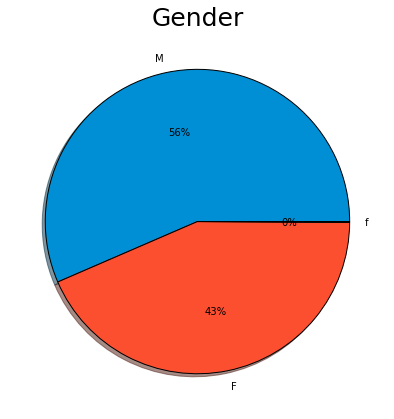

In [8]:
#displaying the values in percentage using pie chart
data1 = df['Gender'].value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(data1.values(), labels = ['M', 'F', 'f'], 
        wedgeprops={'edgecolor': 'black'},
        colors = ['#008fd5', '#fc4f30'],
        autopct='%.0f%%', shadow=True)
plt.title("Gender", fontsize=25)
plt.show()

##### The Pie chart displays the results that Gender Coulmn has data for Male - 56 % Female - 43 % , which is realtively good.

In [9]:
df['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

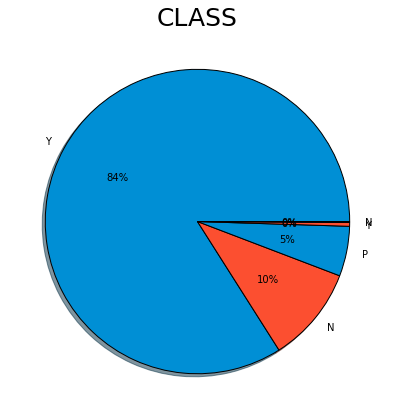

In [10]:
data = df['CLASS'].value_counts().to_dict()
plt.figure(figsize=(7,7))
plt.pie(data.values(), labels = ['Y', 'N', 'P' ,'Y' ,'N'], 
        wedgeprops={'edgecolor': 'black'},
        colors = ['#008fd5', '#fc4f30'],
        autopct='%.0f%%', shadow=True)
plt.title("CLASS", fontsize=25)
plt.show()

##### The Pie chart clearly shows that the data is very Imbalance resulting Y- 84 % N -10 % P - 5% , resulting as a imbalanced dataset.

### Displaying a pairplot to find out the correlation between the various features of the dataset

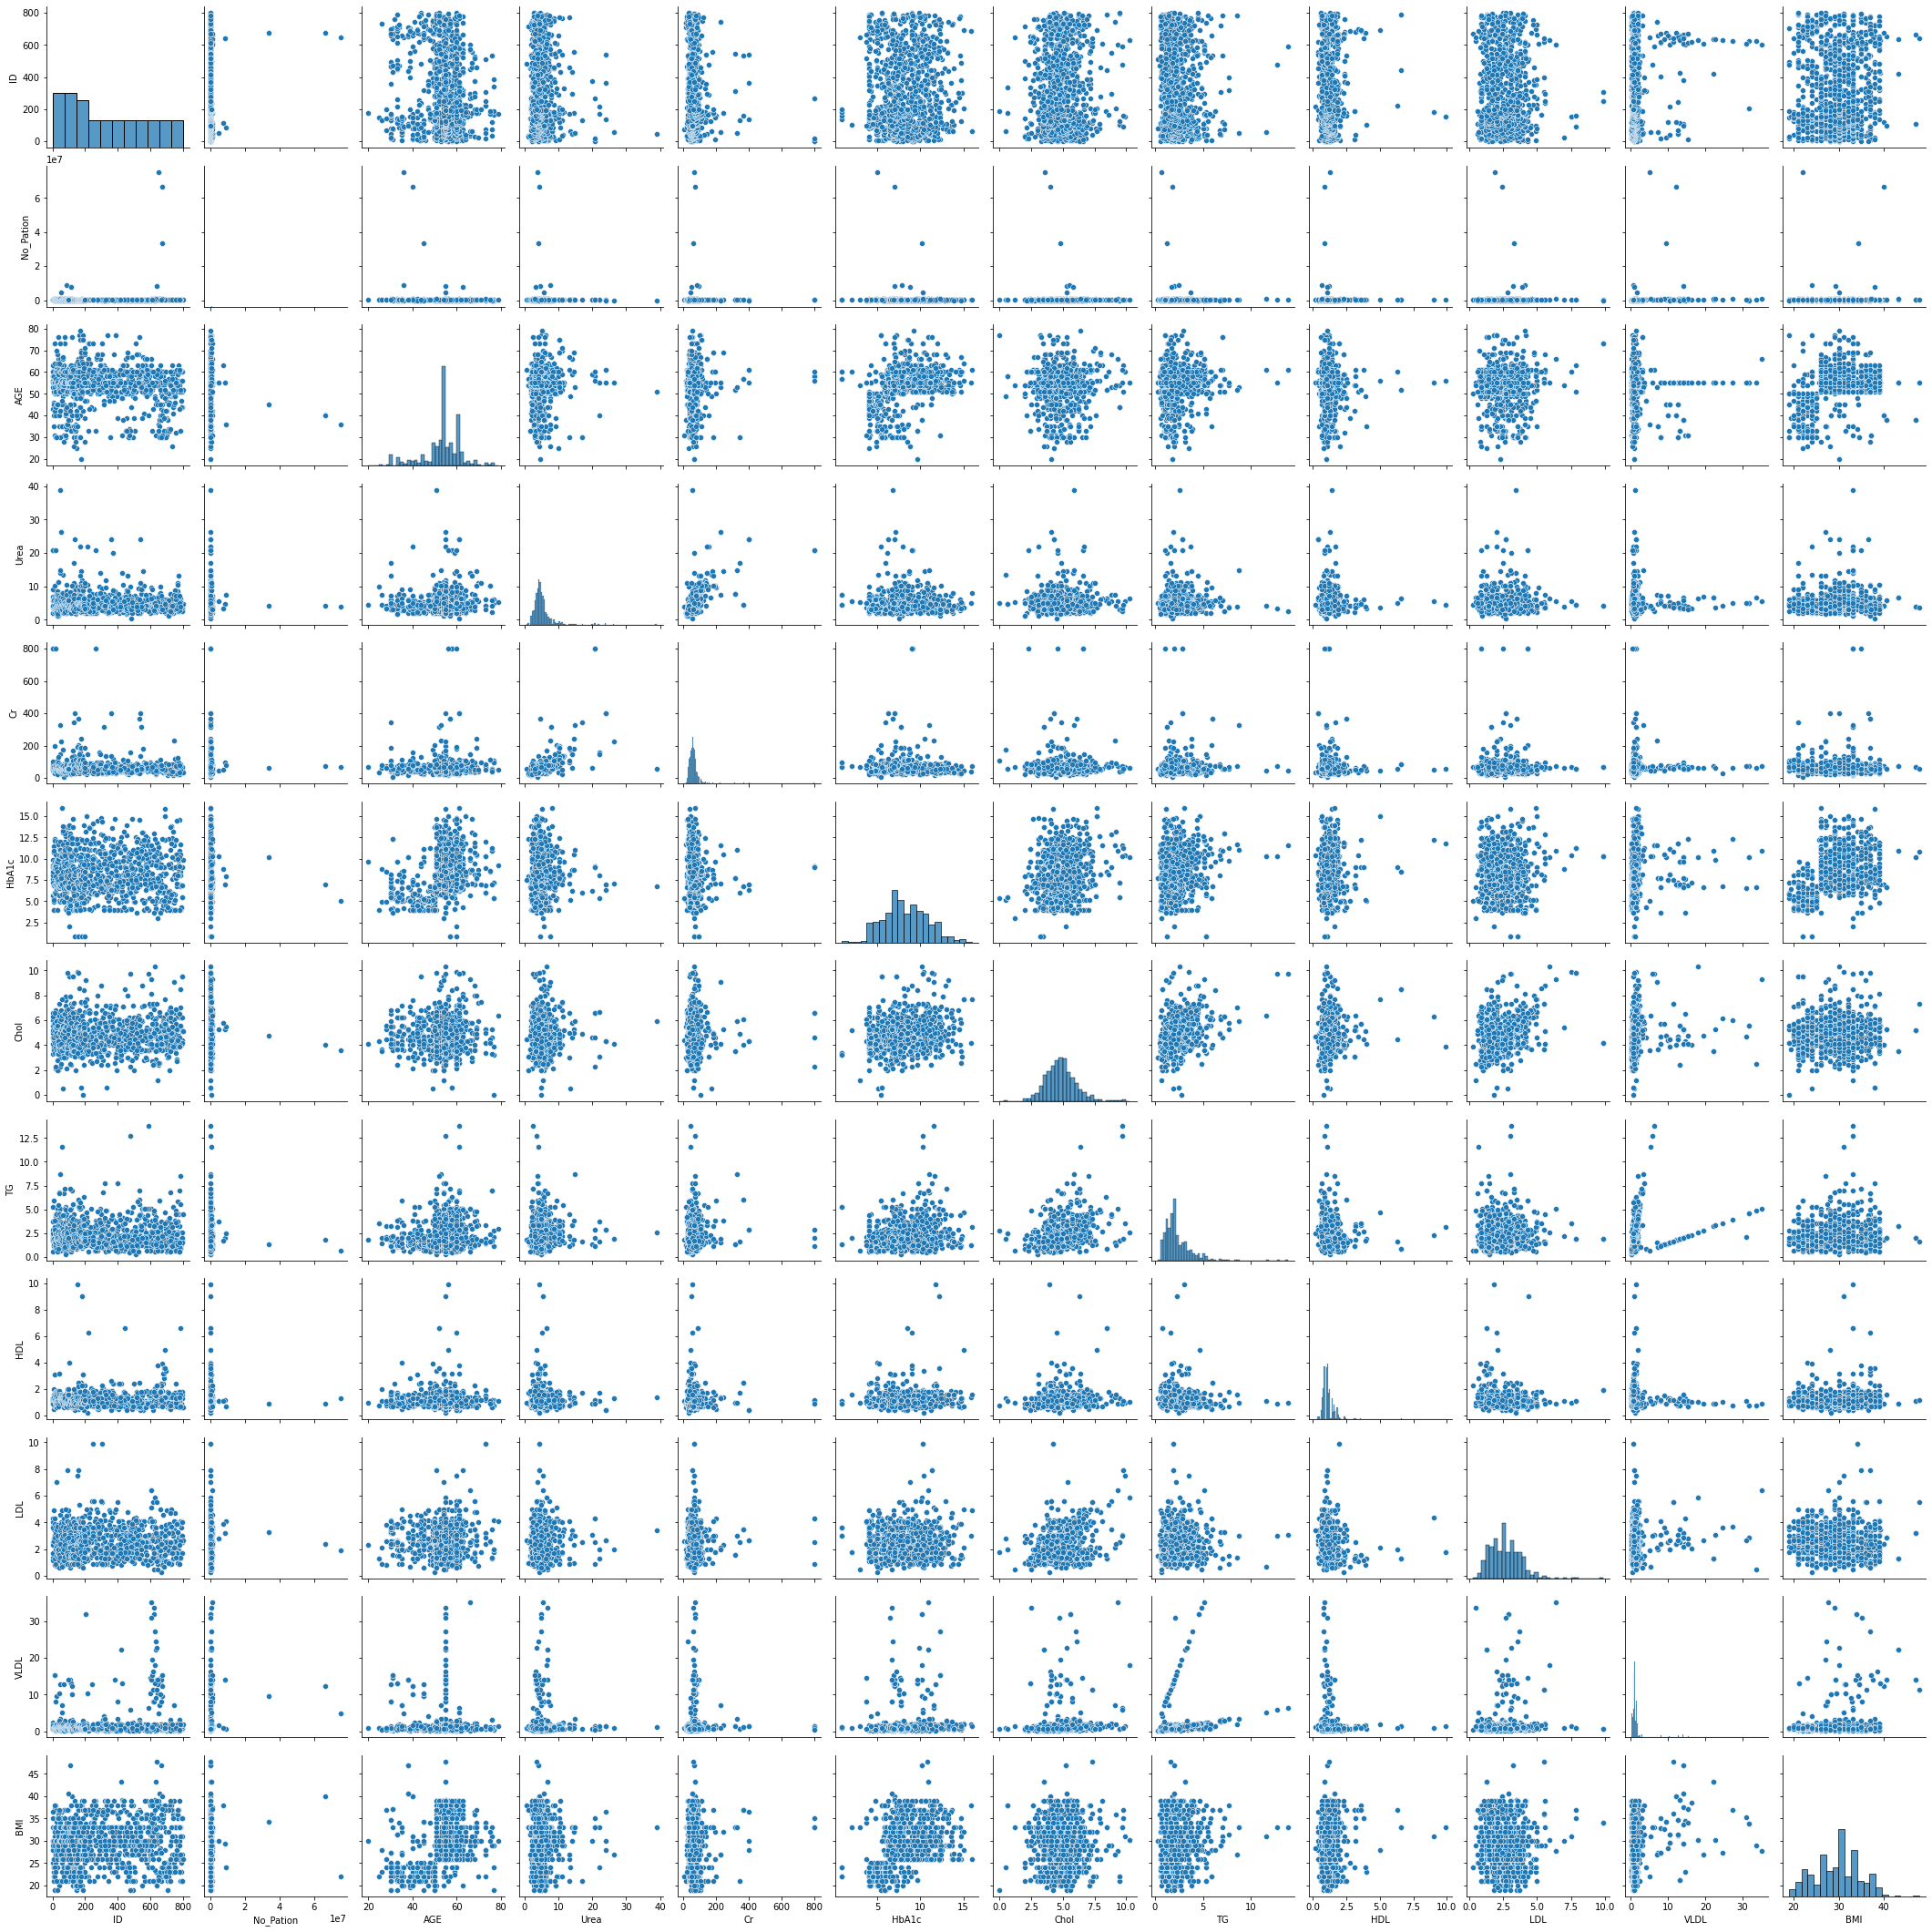

In [11]:
#Displaying pairplot that shows relationship among any two variables
sns.pairplot(df)

### Checking for Correlation between columns using Heatmap Plot

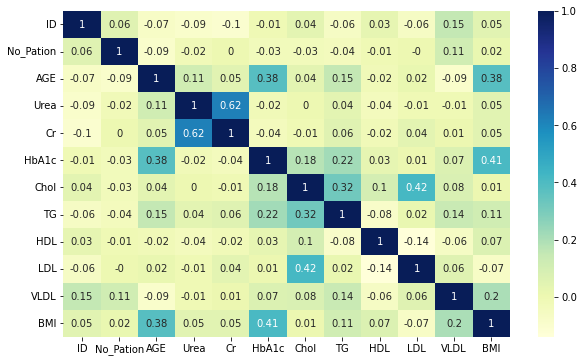

In [12]:
#Displaying Correlation heatmap which shows the extent of correlation between predictors

plt.figure(figsize=(10,6))
plot = sns.heatmap(df.corr().round(2), cmap="YlGnBu", annot=True)

### Calculating number of unique values to understand the significance of that column

In [13]:
#Number of unique values in ID
df.ID.unique().size

800

In [14]:
#Number of unique values in No_Pation
df.No_Pation.unique().size

961

### Checking for redundant data

In [15]:
#Check for the unique values in CLASS
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [16]:
#Check for the unique values in Gender
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

# Feature Engineering

##### Replacing duplicate values in CLASS and Gender column

In [17]:
#String maniplulation for CLASS Column
df['CLASS'] = df['CLASS'].str.replace(" ", "")

In [18]:
df['Gender'] = df['Gender'].str.replace("f", "F")

<AxesSubplot:xlabel='Gender'>

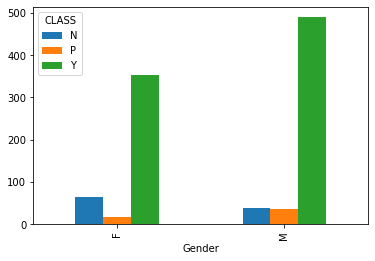

In [19]:
df_gb1 = df.groupby(['Gender','CLASS']).size().unstack(level=1)
df_gb1.plot(kind = 'bar')

##### By using group by we just fixed the results of the duplicate data

##### Dropping ID and No_Pation as they are irrelevant and unique for all patients which is irrevalant for predictions

In [20]:
#Drop ID and No_Pation column
df.drop(['ID','No_Pation'],axis=1,inplace=True)

In [21]:
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Text(0.5, 1.0, 'Average Cr levels based on CLASS')

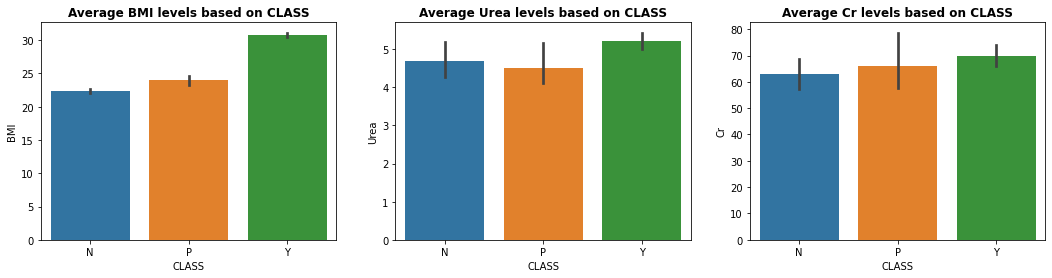

In [22]:
plt.figure(figsize=(18,4))

plt.subplot(131)
sns.barplot(x= 'CLASS',y='BMI',data = df,estimator = np.mean)
plt.title("Average BMI levels based on CLASS", fontweight='bold')

plt.subplot(132)
sns.barplot(x= 'CLASS',y='Urea',data = df,estimator = np.mean)
plt.title("Average Urea levels based on CLASS", fontweight='bold')

plt.subplot(133)
sns.barplot(x= 'CLASS',y='Cr',data = df,estimator = np.mean)
plt.title("Average Cr levels based on CLASS", fontweight='bold')

### Label Encoding Gender and CLASS columns which have categorical values

In [23]:
#Label Encoding the Gender and CLASS columns
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['CLASS']=le.fit_transform(df['CLASS'])

In [24]:
#Displaying top 5 rows in the dataset
df.head(5)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [25]:
_y_imbalance = df['CLASS'].value_counts()/len(df)*100  # % of each class in the dataset

_y_imbalance

2    84.4
0    10.3
1     5.3
Name: CLASS, dtype: float64

In [26]:
dict_y = { '0':int( _y_imbalance[0]),
          '1': int(_y_imbalance[1]),
          '2': int(_y_imbalance[2]),
    
}

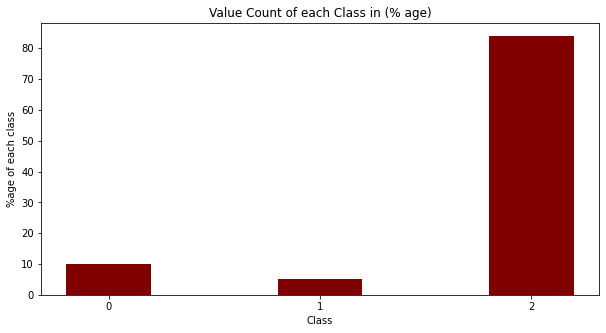

In [27]:
type_ = list(dict_y.keys())
percentage = list(dict_y.values())
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(type_, percentage, color ='maroon',
        width = 0.4)
plt.xlabel("Class")
plt.ylabel("%age of each class")
plt.title("Value Count of each Class in (% age)")
plt.show()

##### The bar graph shows the imbalance in the dataset. Majority of the values are of class 2 which is around 84%

##### 0 - No Patient is not Diabtece

##### 1-  Patient is Prone to Diabetec

##### 2- Yes Patient is Diabetec

In [28]:
df.corr()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
Gender,1.000000,0.021486,0.116311,0.154870,-0.009362,-0.064763,0.052111,-0.130130,0.054563,0.194120,0.072097,0.103397
AGE,0.021486,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956,0.443009
Urea,0.116311,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618,0.067010
Cr,0.154870,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746,0.037500
HbA1c,-0.009362,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350,0.555321
Chol,-0.064763,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678,0.167375
TG,0.052111,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757,0.182299
HDL,-0.130130,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409,-0.001248
LDL,0.054563,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322,0.004247
VLDL,0.194120,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133,0.101247


##### Splitting the dataframe into features (X) and labels (y)

In [29]:
#Splitting dataframe into features (X) and output (y)
X=df.iloc[:,0:11]
y=df.iloc[:,11]

In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    2
996    2
997    2
998    2
999    2
Name: CLASS, Length: 1000, dtype: int32

#  Model 1 - Continous Features

##### Defining the features

In [31]:
#Defining the dataframe of only continous features
X2= X.drop(['Gender'],axis=1)


In [32]:
len(y)

1000

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)
X_scaled[:3]

array([[-0.40114429, -0.14478078, -0.38267195, -1.3349833 , -0.50943577,
        -1.03508433,  1.81075636, -1.08545731, -0.369958  , -1.12462205],
       [-3.13001704, -0.21295413, -0.11580401, -1.3349833 , -0.89372998,
        -0.67806268, -0.1586921 , -0.4573978 , -0.34264878, -1.32623876],
       [-0.40114429, -0.14478078, -0.38267195, -1.3349833 , -0.50943577,
        -1.03508433,  1.81075636, -1.08545731, -0.369958  , -1.12462205]])

#####  StandardScaler() function to standardize the data values into a standard format
##### fit_transform() along with the assigned object to transform the data and standardize it.

##### Splitting the dataset into traning and test set

In [34]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X2 ,y , random_state=42,test_size=0.20, shuffle=True)

In [35]:
X2

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...
995,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [36]:
y.value_counts()

2    844
0    103
1     53
Name: CLASS, dtype: int64

#### Fitting the data to Gaussian Naive Bayes Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

In [37]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score #precision score

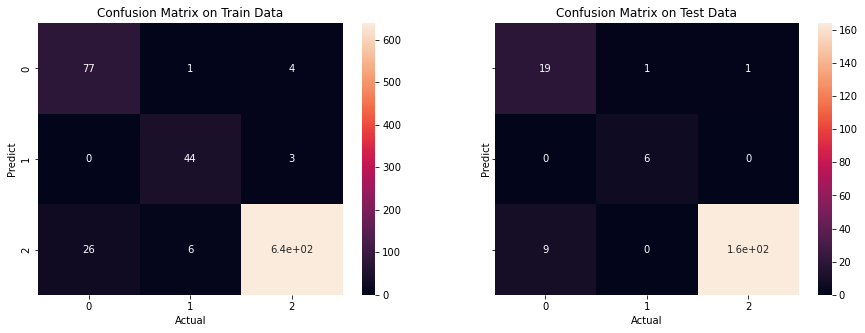

Precision on Train Data :  95%
Precision on Test Data :  94%
Recall on Train Data :  95%
Recall on Test Data :  94%
F1 on Train Data :  95%
F1 on Test Data :  94%

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        82
           1       0.86      0.94      0.90        47
           2       0.99      0.95      0.97       671

    accuracy                           0.95       800
   macro avg       0.87      0.94      0.90       800
weighted avg       0.96      0.95      0.95       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.68      0.90      0.78        21
           1       0.86      1.00      0.92         6
           2       0.99      0.95      0.97       173

    accuracy                           0.94       200
   macro avg       0.84      0.95      0.89       200
weighted avg       0.96      0.94      0.95       200


In [38]:
#Model Instatntiated
model1 = GaussianNB()
#Data fit to the model
model1.fit(X_train, y_train.values)
#Model Performance Evaluation
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
#print("Gaussian Naive Bayes model accuracy with continous features:", metrics.accuracy_score(y_test, y_pred)*100)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))



##### The overall accuray is 95 % where as the f1 score is also is 92 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 92 % which is very close to over all performance

##### Model is not overfitting

#### Fitting the data to Logistic Regression  Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

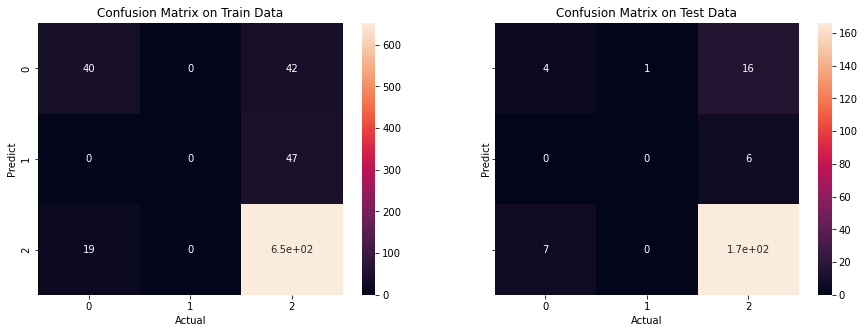

Precision on Train Data :  86%
Precision on Test Data :  85%
Recall on Train Data :  86%
Recall on Test Data :  85%
F1 on Train Data :  86%
F1 on Test Data :  85%

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.68      0.49      0.57        82
           1       0.00      0.00      0.00        47
           2       0.88      0.97      0.92       671

    accuracy                           0.86       800
   macro avg       0.52      0.49      0.50       800
weighted avg       0.81      0.86      0.83       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.36      0.19      0.25        21
           1       0.00      0.00      0.00         6
           2       0.88      0.96      0.92       173

    accuracy                           0.85       200
   macro avg       0.42      0.38      0.39       200
weighted avg       0.80      0.85      0.82       200


In [39]:
#Model Instatntiated
model2 = LogisticRegression(multi_class='multinomial')

#Data fit to the model
model2.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
#print("Gaussian Naive Bayes model accuracy with continous features:", metrics.accuracy_score(y_test, y_pred)*100)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))



##### The overall accuray is 85 % where as the f1 score is also is 0 %. It means the imbalance class performance of this model is very poor

##### The minority class label 1 has an overall f1 score of 0 % which is very poor to over all performance

##### Model is not overfitting

##### Lets use scaled features

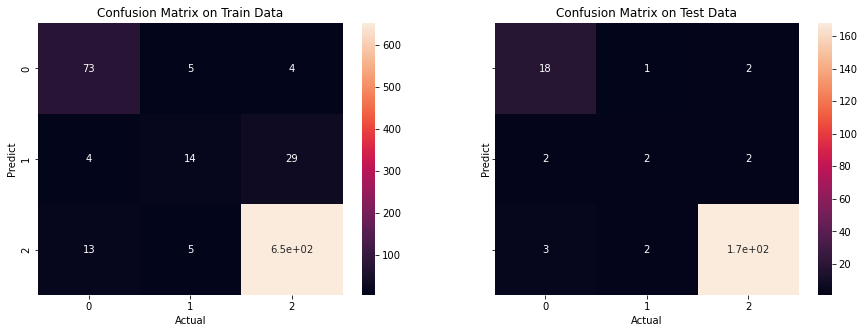

Precision on Train Data :  92%
Precision on Test Data :  94%
Recall on Train Data :  92%
Recall on Test Data :  94%
F1 on Train Data :  92%
F1 on Test Data :  94%

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        82
           1       0.58      0.30      0.39        47
           2       0.95      0.97      0.96       671

    accuracy                           0.93       800
   macro avg       0.78      0.72      0.74       800
weighted avg       0.92      0.93      0.92       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        21
           1       0.40      0.33      0.36         6
           2       0.98      0.97      0.97       173

    accuracy                           0.94       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.94      0.94      0.94       200


In [40]:

#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X_scaled ,y , random_state=42,test_size=0.20, shuffle=True)
#Model Instatntiated
model2 = LogisticRegression(multi_class='multinomial')

#Data fit to the model
model2.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
#print("Gaussian Naive Bayes model accuracy with continous features:", metrics.accuracy_score(y_test, y_pred)*100)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))



##### After using the scale features, the overall accuray is increased to 94 %  from  85 % where as the f1 score is also is 36 %. It means the imbalance class .

##### performance of this model is performing poor with logistic regression model  for this data set.

##### The minority class label 1 has an overall f1 score is raised to 0.36 from 0 %

##### Model is not overfitting

#### Fitting the data to Support Vector Machine Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

In [41]:
from sklearn.svm import SVC

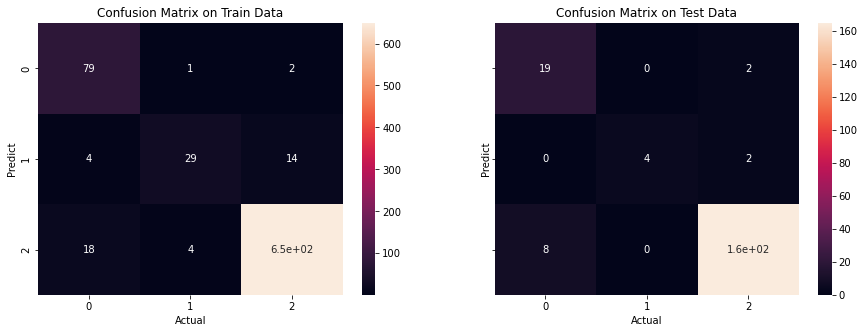

Precision on Train Data :  94%
Precision on Test Data :  94%
Recall on Train Data :  94%
Recall on Test Data :  94%
F1 on Train Data :  94%
F1 on Test Data :  94%

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        82
           1       0.85      0.62      0.72        47
           2       0.98      0.97      0.97       671

    accuracy                           0.95       800
   macro avg       0.87      0.85      0.85       800
weighted avg       0.95      0.95      0.95       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        21
           1       1.00      0.67      0.80         6
           2       0.98      0.95      0.96       173

    accuracy                           0.94       200
   macro avg       0.89      0.84      0.85       200
weighted avg       0.95      0.94      0.94       200


In [42]:

#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=42,test_size=0.20, shuffle=True)
#Model Instatntiated
model3 = SVC(kernel = 'linear', C = 1)

#Data fit to the model
model3.fit(X_train, y_train)

#Model Performance Evaluation
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 94 % where as the f1 score is also is 94 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 80 % which is less as compared to the overall model performance.

#### Fitting the data to K Neighbors Classifier with K=3 along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

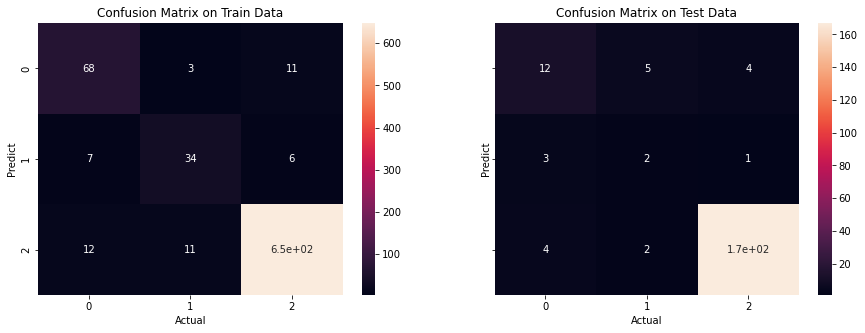

Precision on Train Data :  93%
Precision on Test Data :  90%
Recall on Train Data :  93%
Recall on Test Data :  90%
F1 on Train Data :  93%
F1 on Test Data :  90%

Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        82
           1       0.71      0.72      0.72        47
           2       0.97      0.97      0.97       671

    accuracy                           0.94       800
   macro avg       0.82      0.84      0.83       800
weighted avg       0.94      0.94      0.94       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.22      0.33      0.27         6
           2       0.97      0.97      0.97       173

    accuracy                           0.91       200
   macro avg       0.61      0.62      0.61       200
weighted avg       0.91      0.91      0.91       200


In [43]:

#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=42,test_size=0.20, shuffle=True)
#Model Instatntiated
model4 = KNeighborsClassifier(n_neighbors=3)

#Data fit to the model
model4.fit(X_train, y_train)

#Model Performance Evaluation
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

In [44]:
# calculating the accuracy of models with different values of k
Test_f_1_score = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    Test_f_1_score[i-1] = f1_score(y_test, yhat,average='micro')

print(Test_f_1_score)

[0.895 0.89  0.905 0.89  0.9   0.905 0.92  0.915 0.91  0.92  0.93  0.925
 0.92  0.93  0.91  0.915 0.915 0.91  0.905 0.91 ]


In [45]:
# calculating the accuracy of models with different values of k
Train_f_1_score = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_train)
    Train_f_1_score[i-1] = f1_score(y_train, yhat,average='micro')

print(Train_f_1_score)

[1.      0.955   0.9375  0.9275  0.91125 0.90375 0.90125 0.8975  0.9025
 0.90375 0.89125 0.89    0.88    0.88125 0.87    0.88    0.875   0.875
 0.87375 0.8675 ]


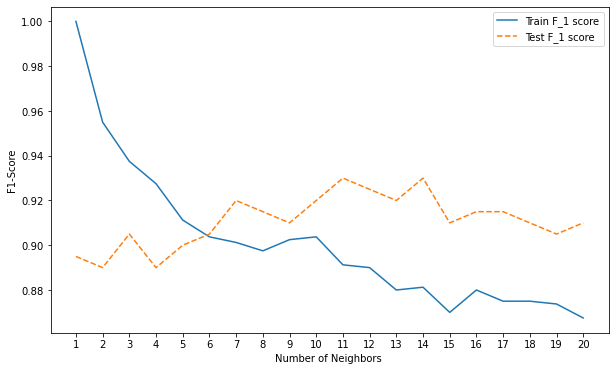

In [46]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
line1, = plt.plot(range(1,21), Train_f_1_score,label='Train F_1 score')
line2, = plt.plot(range(1,21), Test_f_1_score,linestyle = 'dashed',label='Test F_1 score')

plt.legend(handles=[line1, line2])
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('F1-Score')
plt.show()

  At K=7 the value of Train F1-score is 0.946 and Train F1-score is 0.945 which is very close and gives the optimal value of K.

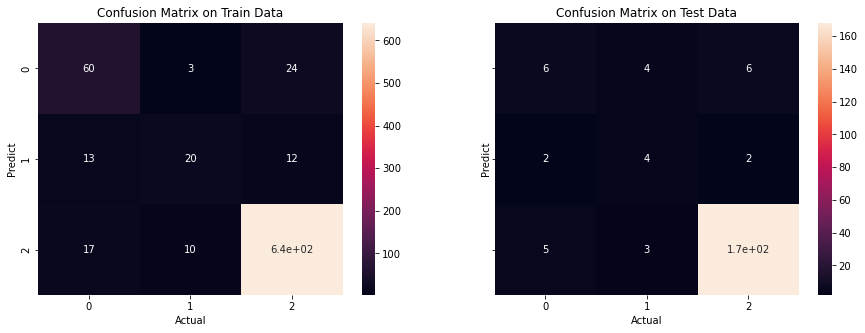

Precision on Train Data :  90%
Precision on Test Data :  89%
Recall on Train Data :  90%
Recall on Test Data :  89%
F1 on Train Data :  90%
F1 on Test Data :  89%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.67      0.69      0.68        87
           1       0.61      0.44      0.51        45
           2       0.95      0.96      0.95       668

    accuracy                           0.90       800
   macro avg       0.74      0.70      0.71       800
weighted avg       0.90      0.90      0.90       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.46      0.38      0.41        16
           1       0.36      0.50      0.42         8
           2       0.95      0.95      0.95       176

    accuracy                           0.89       200
   macro avg       0.59      0.61      0.60       200
weighted avg       0.89      0.89      0.89       200

In [47]:

#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)
#Model Instatntiated
model4 = KNeighborsClassifier(n_neighbors=7)

#Data fit to the model
model4.fit(X_train, y_train)

#Model Performance Evaluation
y_pred_train = model4.predict(X_train)
y_pred_test = model4.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

#### Fitting the data to Decision Tree Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

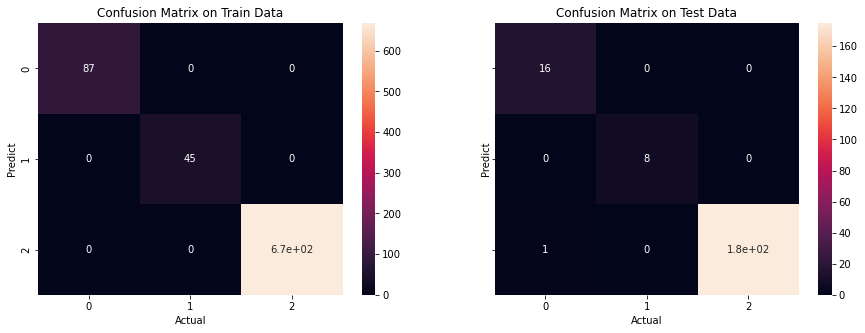

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       176

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       

In [48]:
#Model Instatntiated
model5 = DecisionTreeClassifier(random_state=0)

#Data fit to the model
model5.fit(X_train, y_train)

#Model Performance Evaluation
y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 99 % where as the f1 score is also is 99 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 % which is a good sign when compared  to over all performance

#####  Model is not overfitting

##### This is the best model upto here to predict the future chances of detecting whether the patient is prone to diabetic or not.

#### Fitting the data to Random Forest Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

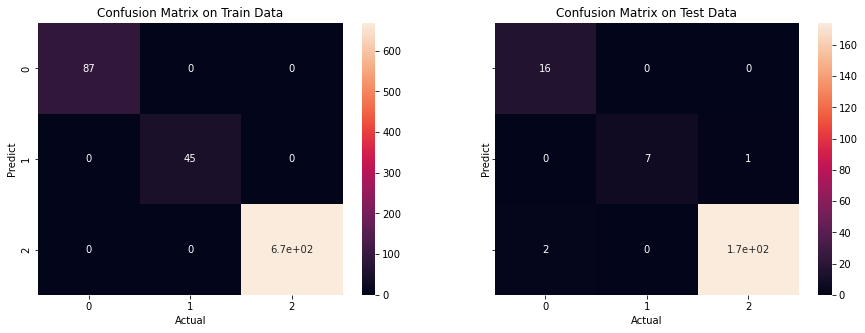

Precision on Train Data :  100%
Precision on Test Data :  98%
Recall on Train Data :  100%
Recall on Test Data :  98%
F1 on Train Data :  100%
F1 on Test Data :  98%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.93         8
           2       0.99      0.99      0.99       176

    accuracy                           0.98       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.99      0.98      0.99       

In [49]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)
#Model Instatntiated
model6 = RandomForestClassifier(criterion='entropy',n_estimators=50)
model6.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model6.predict(X_train)
y_pred_test = model6.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 99 % where as the f1 score is also is 99 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 % which is over then the  over all performance

##### Model is not Overfitting

##### Random Forest Classifier Hyperparameter Tuning to find best set of parameters

In [50]:
#Hyperparameter Tuning using RandomisedSearch Cross Validation
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)
rcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)
rcv.best_estimator_

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=89)

##### Random Forest Classifier with the best set of parameters 

In [51]:
rcv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=89)

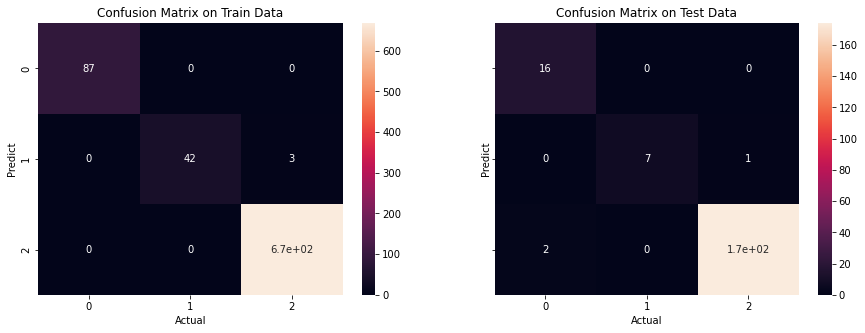

Precision on Train Data :  99%
Precision on Test Data :  98%
Recall on Train Data :  99%
Recall on Test Data :  98%
F1 on Train Data :  99%
F1 on Test Data :  98%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      0.93      0.97        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      0.98      0.99       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.93         8
           2       0.99      0.99      0.99       176

    accuracy                           0.98       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.99      0.98      0.99       200

In [52]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)
#Model Instatntiated
#Model Instatntiated
model6 = RandomForestClassifier(criterion='entropy', max_depth=230, max_features='log2',
                       min_samples_leaf=4, n_estimators=89)
model6.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model6.predict(X_train)
y_pred_test = model6.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

#### Fitting the data to XGBosst Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

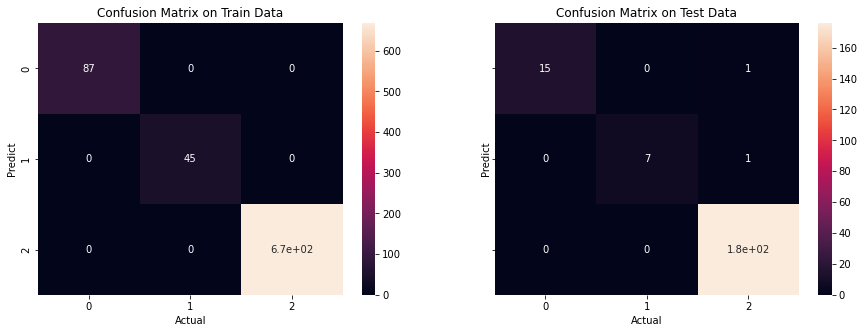

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      0.99       176

    accuracy                           0.99       200
   macro avg       1.00      0.94      0.97       200
weighted avg       0.99      0.99      0.99       

In [53]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)
#Model Instatntiated
#Model Instatntiated
model7 = XGBClassifier()

#Data fit to the model
model7.fit(X_train, y_train)

model6.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model7.predict(X_train)
y_pred_test = model7.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### Hyperparameter Tuning using RandomisedSearch Cross Validation

In [54]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini'],
    'learning_rate': [0.01,0.1,0.2]
}
print(param_grid)
rcv = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)
rcv.best_estimator_

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini'], 'learning_rate': [0.01, 0.1, 0.2]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[19:17:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='entropy', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=780, max_leaves=0, min_child_weight=1,
              min_samples_leaf=2, min_samples_split=10, missing=nan,
              monotone_constraints='()', n_estimators=23, n_jobs=0, ...)

[19:17:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.



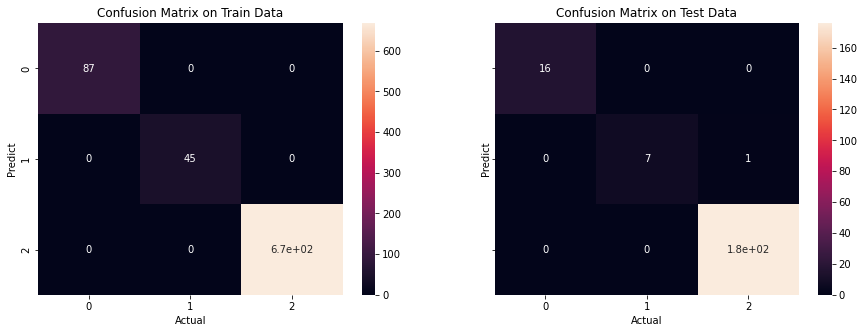

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       

In [55]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)
#Model Instatntiated
#Model Instatntiated
model8 = XGBClassifier(criterion='gini', max_depth=450, min_samples_leaf=4,
              min_samples_split=14, n_estimators=23,
              objective='multi:softprob')

#Data fit to the model
model8.fit(X_train, y_train)

model6.fit(X_train, y_train)
#Model Performance Evaluation
y_pred_train = model8.predict(X_train)
y_pred_test = model8.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### After implementing the XGBoost classifier we found this model is performing very accurate then we also employed hyper parameter tuning with cross validation


##### Then the overall accuray is 100 %  test accuracy where as the f1 score is also is 99  % on test data. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 % which is almost the same as overall performance of the model with the maximum support.

##### The XG Boost Classifier performs the best when it deals with only Continous Features  and inbalance dataset with an Train F1-Score of 100% and Test F1-Score of 99% which makes it the best choice of model when trying to predict diabetes using the above mentioned data.

# Model 2 - All Features

##### Defining the features

In [56]:
#Defining the entire dataset with all features
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


##### Splitting the dataset into traning and test set

In [57]:
#Train Test split of the entire dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0,test_size=0.20, shuffle=True)

#### Fitting the data to Gaussian Naive Bayes Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

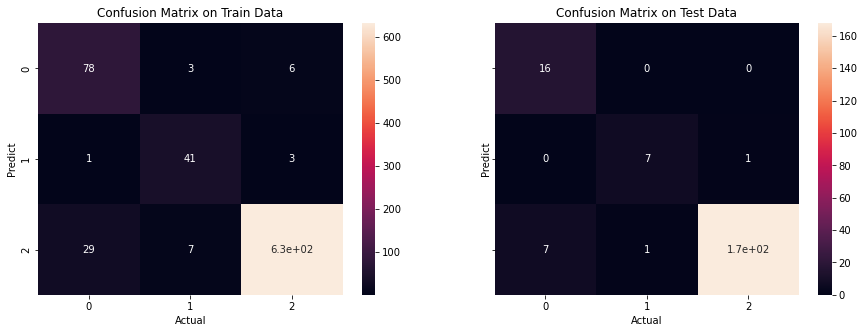

Precision on Train Data :  93%
Precision on Test Data :  95%
Recall on Train Data :  93%
Recall on Test Data :  95%
F1 on Train Data :  93%
F1 on Test Data :  95%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        87
           1       0.80      0.91      0.85        45
           2       0.99      0.95      0.97       668

    accuracy                           0.94       800
   macro avg       0.84      0.92      0.87       800
weighted avg       0.95      0.94      0.94       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       0.88      0.88      0.88         8
           2       0.99      0.95      0.97       176

    accuracy                           0.95       200
   macro avg       0.85      0.94      0.89       200
weighted avg       0.97      0.95      0.96       200

In [58]:
#Model Instatntiated
mod1 = GaussianNB()

#Data fit to the model
mod1.fit(X_train, y_train)

y_pred_train = mod1.predict(X_train)
y_pred_test = mod1.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 94 % where as the f1 score is also is 93 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 85 % which is close to over all performance of the model

#### Fitting the data to Logistic Regression Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

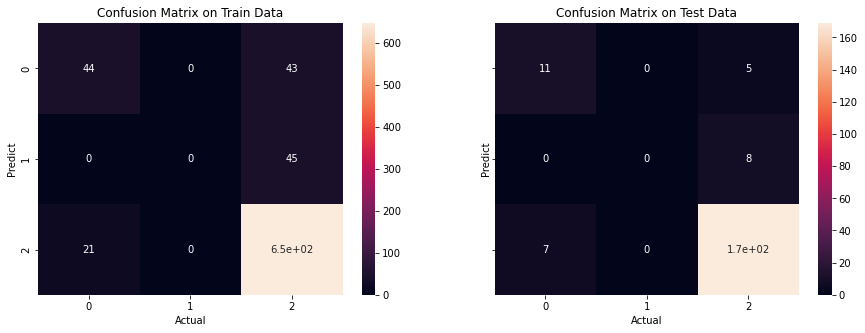

Precision on Train Data :  86%
Precision on Test Data :  90%
Recall on Train Data :  86%
Recall on Test Data :  90%
F1 on Train Data :  86%
F1 on Test Data :  90%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.68      0.51      0.58        87
           1       0.00      0.00      0.00        45
           2       0.88      0.97      0.92       668

    accuracy                           0.86       800
   macro avg       0.52      0.49      0.50       800
weighted avg       0.81      0.86      0.83       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.61      0.69      0.65        16
           1       0.00      0.00      0.00         8
           2       0.93      0.96      0.94       176

    accuracy                           0.90       200
   macro avg       0.51      0.55      0.53       200
weighted avg       0.87      0.90      0.88       200

In [59]:
#Model Instatntiated
mod2 = LogisticRegression()

#Data fit to the model
mod2.fit(X_train, y_train)
y_pred_train = mod2.predict(X_train)
y_pred_test = mod2.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 86 % where as the f1 score is also is 86 %. It means the imbalance class performance of this model is very poor.

##### The minority class label 1 has an overall f1 score of 0 % which is very poor with the comparsion of overall performance.

#### Fitting the data to Support Vector Machine along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

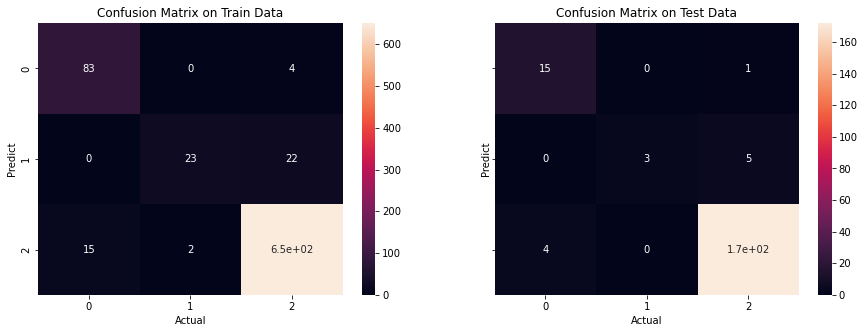

Precision on Train Data :  94%
Precision on Test Data :  95%
Recall on Train Data :  94%
Recall on Test Data :  95%
F1 on Train Data :  94%
F1 on Test Data :  95%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        87
           1       0.92      0.51      0.66        45
           2       0.96      0.97      0.97       668

    accuracy                           0.95       800
   macro avg       0.91      0.81      0.84       800
weighted avg       0.95      0.95      0.94       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       1.00      0.38      0.55         8
           2       0.97      0.98      0.97       176

    accuracy                           0.95       200
   macro avg       0.92      0.76      0.79       200
weighted avg       0.95      0.95      0.95       200

In [60]:
#Model Instatntiated
mod3 = SVC(kernel='linear',C=1)

#Data fit to the model
mod3.fit(X_train, y_train)
y_pred_train = mod3.predict(X_train)
y_pred_test = mod3.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 95 % where as the f1 score is also is 95 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 66 % which is very less when comapared with to over all performance

#### Fitting the data to K- Nearest Neighbour along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

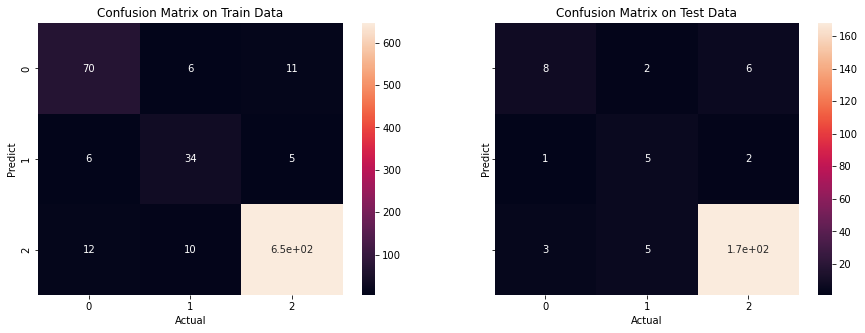

Precision on Train Data :  93%
Precision on Test Data :  90%
Recall on Train Data :  93%
Recall on Test Data :  90%
F1 on Train Data :  93%
F1 on Test Data :  90%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        87
           1       0.68      0.76      0.72        45
           2       0.98      0.97      0.97       668

    accuracy                           0.94       800
   macro avg       0.82      0.84      0.83       800
weighted avg       0.94      0.94      0.94       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.42      0.62      0.50         8
           2       0.95      0.95      0.95       176

    accuracy                           0.91       200
   macro avg       0.68      0.69      0.68       200
weighted avg       0.91      0.91      0.91       200

In [61]:
#Model Instatntiated
mod4 = KNeighborsClassifier(n_neighbors=3)

#Data fit to the model
mod4.fit(X_train, y_train)
y_pred_train = mod4.predict(X_train)
y_pred_test = mod4.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 94 % where as the f1 score is also is 90 %. It means the imbalance class performance of this model is less.

##### The minority class label 1 has an overall f1 score of 72 % which is very less when comapred to over all performance

[1.      0.95375 0.9375  0.92875 0.9125  0.915   0.90125 0.89875 0.89875
 0.8975  0.89125 0.88625 0.88125 0.8825  0.8825  0.88    0.88    0.8775
 0.87875 0.87375]
[1.    0.95  0.955 0.935 0.935 0.94  0.925 0.925 0.915 0.925 0.92  0.91
 0.89  0.895 0.89  0.89  0.88  0.885 0.885 0.89 ]


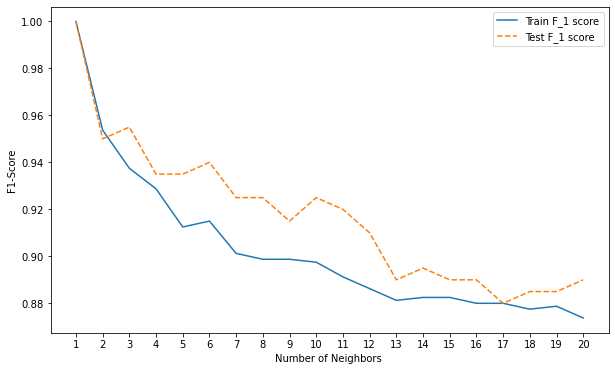

In [62]:
# calculating the accuracy of models with different values of k
Train_f_1_score = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_train)
    Train_f_1_score[i-1] = f1_score(y_train, yhat,average='micro')

print(Train_f_1_score)


# calculating the accuracy of models with different values of k
Test_f_1_score = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_test,y_test)
    yhat= knn.predict(X_test)
    Test_f_1_score[i-1] = f1_score(y_test, yhat,average='micro')

print(Test_f_1_score)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
line1, = plt.plot(range(1,21), Train_f_1_score,label='Train F_1 score')
line2, = plt.plot(range(1,21), Test_f_1_score,linestyle = 'dashed',label='Test F_1 score')

plt.legend(handles=[line1, line2])
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('F1-Score')
plt.show()

##### When K=3 the F1-score of Train is 0.95 and Test is 0.93 which is the optimal values in the dataset.

#### Fitting the data to Decision Tree Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

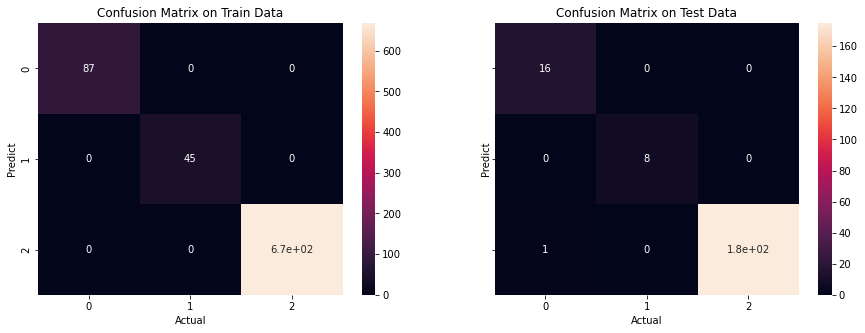

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       176

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       

In [63]:
#Model Instatntiated
mod5 = DecisionTreeClassifier(random_state=0)

#Data fit to the model
mod5.fit(X_train, y_train)

y_pred_train = mod5.predict(X_train)
y_pred_test = mod5.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 100 % where as the f1 score is also is 99 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 % which is equal to over all performance of the model

#### Fitting the data to Random Forest Classification along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

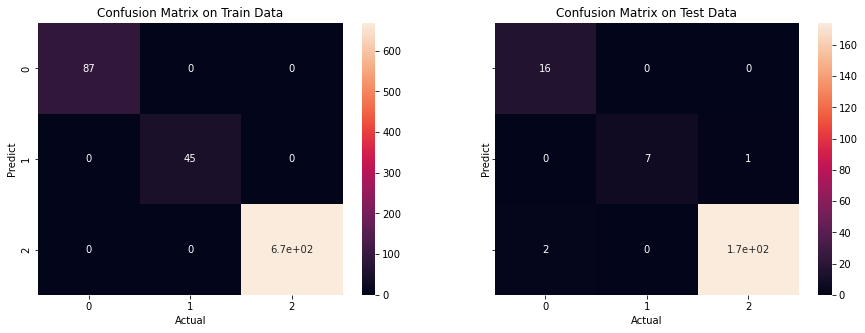

Precision on Train Data :  100%
Precision on Test Data :  98%
Recall on Train Data :  100%
Recall on Test Data :  98%
F1 on Train Data :  100%
F1 on Test Data :  98%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.93         8
           2       0.99      0.99      0.99       176

    accuracy                           0.98       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.99      0.98      0.99       

In [64]:
#Model Instatntiated
mod6 = RandomForestClassifier(criterion='entropy',n_estimators=50)
mod6 = mod6.fit(X_train,y_train)
y_pred_train = mod6.predict(X_train)
y_pred_test = mod6.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 100 % where as the f1 score is also is 100 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 %  test accuracy which is same as the over all performance

##### Random Forest Classifier Hyperparameter Tuning to find best set of parameters

In [65]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_features': ['auto','sqrt','log2'],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini']
}
print(param_grid)
rcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)
rcv.best_estimator_

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(criterion='entropy', max_depth=780, min_samples_split=7,
                       n_estimators=45)

In [66]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=780, min_samples_split=7,
                       n_estimators=45)

##### Random Forest Classifier with the best set of parameters 

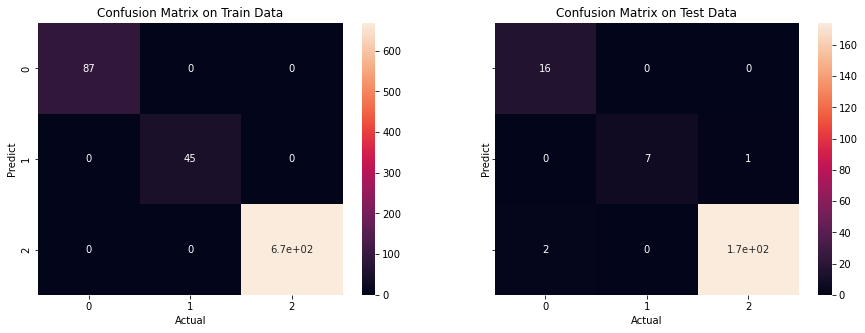

Precision on Train Data :  100%
Precision on Test Data :  98%
Recall on Train Data :  100%
Recall on Test Data :  98%
F1 on Train Data :  100%
F1 on Test Data :  98%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.93         8
           2       0.99      0.99      0.99       176

    accuracy                           0.98       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.99      0.98      0.99       

In [67]:
#Model Instatntiated
mod6 = RandomForestClassifier(max_depth=780, max_features='sqrt', min_samples_split=5,
                       n_estimators=23)

#Data fit to the model
mod6.fit(X_train, y_train)

y_pred_train = mod6.predict(X_train)
y_pred_test = mod6.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

#### Fitting the data to XGBoost Classifier along with model performnace validation using
###### [1] Accuracy score
###### [2] Classification report
###### [3] Confusion matrix

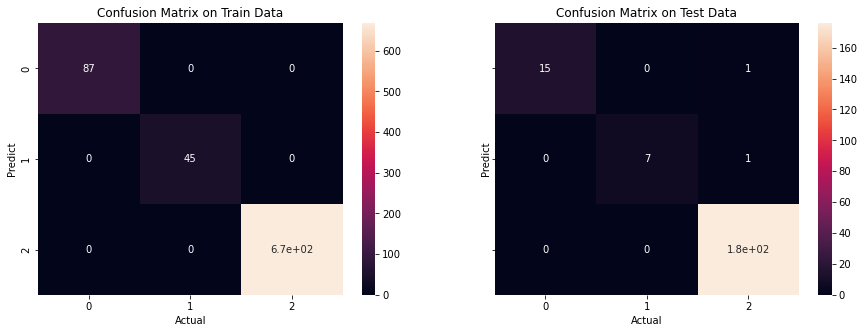

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      0.99       176

    accuracy                           0.99       200
   macro avg       1.00      0.94      0.97       200
weighted avg       0.99      0.99      0.99       

In [68]:
#Model Instatntiated
mod7 = XGBClassifier()


#Data fit to the model
mod7.fit(X_train, y_train)

y_pred_train = mod7.predict(X_train)
y_pred_test = mod7.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### Hyperparameter Tuning using RandomisedSearch Cross Validation

In [69]:
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=2,stop=100,num=10)],
    'max_depth': [int(x) for x in np.linspace(10,1000,10)],
    'min_samples_split': [2,5,7,10,12,14],
    'min_samples_leaf': [1,2,4,6,8],
    'criterion': ['entropy','gini'],
    'learning_rate': [0.01,0.1,0.2]
}
print(param_grid)
rcv = RandomizedSearchCV(estimator=XGBClassifier(),param_distributions=param_grid,n_iter=100,cv=5,verbose=2,n_jobs=-1)
rcv.fit(X_train,y_train)
rcv.best_estimator_

{'n_estimators': [2, 12, 23, 34, 45, 56, 67, 78, 89, 100], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 7, 10, 12, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini'], 'learning_rate': [0.01, 0.1, 0.2]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[19:18:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=560, max_leaves=0, min_child_weight=1,
              min_samples_leaf=6, min_samples_split=10, missing=nan,
              monotone_constraints='()', n_estimators=23, n_jobs=0, ...)

[19:18:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.



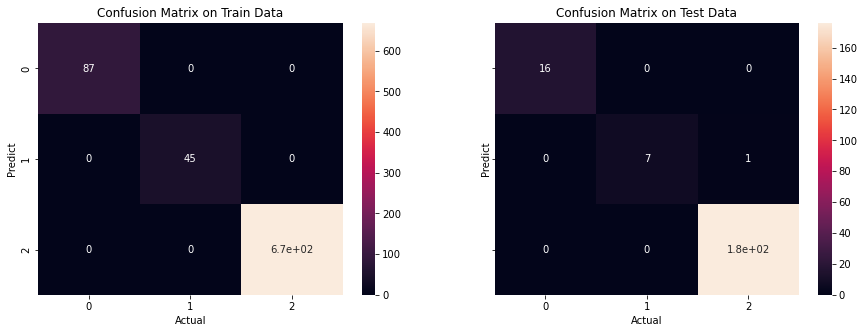

Precision on Train Data :  100%
Precision on Test Data :  99%
Recall on Train Data :  100%
Recall on Test Data :  99%
F1 on Train Data :  100%
F1 on Test Data :  99%

Classification Report for Train Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00       668

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Classification Report for Test Data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.93         8
           2       0.99      1.00      1.00       176

    accuracy                           0.99       200
   macro avg       1.00      0.96      0.98       200
weighted avg       1.00      0.99      0.99       

In [70]:
mod7 = XGBClassifier(criterion='entropy', max_depth=230, min_samples_leaf=1,
              min_samples_split=7, n_estimators=23, objective='multi:softprob')
#Data fit to the model
mod7.fit(X_train, y_train)

y_pred_train = mod7.predict(X_train)
y_pred_test = mod7.predict(X_test)

#Displaying Confusion Matrix 

cm_train = confusion_matrix(y_train,y_pred_train )
cm_test = confusion_matrix(y_test,y_pred_test )

fig, axes = plt.subplots(1, 2,figsize=(15, 5), sharey=True)
sns.heatmap(cm_train,annot=True,ax=axes[0])
sns.heatmap(cm_test,annot=True,ax=axes[1])
axes[0].set_title("Confusion Matrix on Train Data")
axes[1].set_title("Confusion Matrix on Test Data")
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predict')
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predict')
plt.show()

precision_train=precision_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model precision for X_train and X_test 
print( "Precision on Train Data : ", str(int(precision_train*100)) +'%' )

precision_test=precision_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Precision on Test Data : ", str(int(precision_test*100)) +'%' ,)

recall_train=recall_score(y_train,y_pred_train,zero_division='warn',average='micro')

# model recall for X_train and X_test 

print( "Recall on Train Data : ", str(int(recall_train*100)) +'%' )

recall_test=recall_score(y_test,y_pred_test,zero_division='warn',average='micro')

print( "Recall on Test Data : ", str(int(recall_test*100)) +'%' ,)

# model F-1 score for X_train and X_test
F1_score_train =f1_score(y_train, y_pred_train,zero_division='warn',average='micro')

print( "F1 on Train Data : ", str(int(F1_score_train*100)) +'%' )

F1_score_test =f1_score(y_test, y_pred_test,zero_division='warn',average='micro')

print( "F1 on Test Data : ", str(int(F1_score_test*100)) +'%' )

#Displaying Classification Report

print("")
print("Classification Report for Train Data")
print("")
print(classification_report(y_train, y_pred_train))
print("")
print("Classification Report for Test Data")
print("")
print(classification_report(y_test, y_pred_test))

##### The overall accuray is 100 % where as the f1 score is also is 100 %. It means the imbalance class performance of this model is good.

##### The minority class label 1 has an overall f1 score of 100 % which is equal to over all performance

##### The XG Boost Classifier performs the best when it deals with All Features with an Train F1 Score of 100%, and Test F1-Score of 99%, which combinedly makes it the best choice of model when trying to predict diabetes using the above mentioned data.

# Regression

In [71]:
X=df.drop(['BMI'],axis=1)#Declaring Predictors
y=df['BMI']#Declaring Target

In [72]:
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,2
996,1,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,2
997,1,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,2
998,1,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,2


# Correlation between variables and output

We found out the Correlation between the various predictor variables and the output variable or target which is BMI in this case. The higher the values, the more correlated are the two variables.

##### Checking the Relation between the BMI and other features

Pearsons Correlation Between Gender and BMI

In [73]:
cor1,_=pearsonr(X['Gender'],y)
cor1

0.07209650865325458

Spearman Kendall Correlation Between Gender and BMI

In [74]:
cor1,_=kendalltau(X['Gender'],y)
cor1

0.06474849174495358

Pearsons Correlation Between Age and BMI

In [75]:
cor2,_=pearsonr(X['AGE'],y)
cor2

0.37595598337140845

Spearman Kendall Correlation Between Age and BMI

In [76]:
cor2,_=kendalltau(X['AGE'],y)
cor2

0.260797703414395

Pearsons Correlation Between Urea and BMI

In [77]:
cor3,_=pearsonr(X['Urea'],y)
cor3

0.045618151667637497

Spearman Kendall Correlation Between Urea and BMI

In [78]:
cor3,_=kendalltau(X['Urea'],y)
cor3

0.03745279090901246

Pearsons Correlation Between Cr and BMI

In [79]:
cor4,_=pearsonr(X['Cr'],y)
cor4

0.054745774563723495

Spearman Kendall Correlation Between Cr and BMI

In [80]:
cor4,_=kendalltau(X['Cr'],y)
cor4

0.02738258009234585

Pearsons Correlation Between HbA1c and BMI

In [81]:
cor5,_=pearsonr(X['HbA1c'],y)
cor5

0.4133498825698039

Spearman Kendall Correlation Between HbA1c and BMI

In [82]:
cor5,_=kendalltau(X['HbA1c'],y)
cor5

0.2894414919817906

Pearsons Correlation Between Chol and BMI

In [83]:
cor6,_=pearsonr(X['Chol'],y)
cor6

0.013677627587549484

Spearman Kendall Correlation Between Chol and BMI

In [84]:
cor6,_=kendalltau(X['Chol'],y)
cor6

0.00432389391188168

Pearsons Correlation Between TG and BMI

In [85]:
cor7,_=pearsonr(X['TG'],y)
cor7

0.11075749941885521

Spearman Kendall Correlation Between TG and BMI

In [86]:
cor7,_=kendalltau(X['TG'],y)
cor7

0.0743418240319223

Pearsons Correlation Between HDL and BMI

In [87]:
cor8,_=pearsonr(X['HDL'],y)
cor8

0.07240880789042511

Spearman Kendall Correlation Between HDL and BMI

In [88]:
cor8,_=kendalltau(X['HDL'],y)
cor8

0.025176080809646773

Pearsons Correlation Between LDL and BMI

In [89]:
cor9,_=pearsonr(X['LDL'],y)
cor9

-0.06732176571267483

Spearman Kendall Correlation Between LDL and BMI

In [90]:
cor9,_=kendalltau(X['LDL'],y)
cor9

-0.08127135990837918

Pearsons Correlation Between VLDL and BMI

In [91]:
cor10,_=pearsonr(X['VLDL'],y)
cor10

0.19813324844704638

Spearman Kendall Correlation Between VLDL and BMI

In [92]:
cor10,_=kendalltau(X['VLDL'],y)
cor10

0.1523345404899055

Pearsons Correlation Between CLASS and BMI

In [93]:
cor11,_=pearsonr(X['CLASS'],y)
cor11

0.5698785123349901

Spearman Kendall Correlation Between CLASS and BMI

In [94]:
cor11,_=kendalltau(X['CLASS'],y)
cor11

0.4756707105158588

# Linear Regression

In [95]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)

#Output Prediction
y_pred=reg.predict(X_test)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Coefficients:  [-0.13615474  0.08939807 -0.00738205  0.00438374  0.1797715  -0.36300907
 -0.0086606   0.70831704 -0.14674386  0.23007194  3.60605833]
Variance score: 0.39820022667391874
R2 score: 0.39820022667391874
Mean Squared Error: 14.113454327743915


##### Linear Regression is a no regularised regression technique. 
##### This performs and has a R2 score of 0.39 as per our dataset in deteming BMI based on other features.

# Lasso Regression

In [96]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.Lasso(alpha=0.1)
  
# train the model using the training sets
reg.fit(X_train, y_train)

#Output Prediction
y_pred=reg.predict(X_test)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Coefficients:  [-0.          0.09618517 -0.          0.00399864  0.20028926 -0.26163109
 -0.          0.46682554 -0.14513794  0.22080372  3.22376751]
Variance score: 0.40363903108922217
R2 score: 0.40363903108922217
Mean Squared Error: 13.985903070473292


##### Lasso Regression is a regularised regression technique. 
##### This performs and has a R2 score of 0.40 as per our dataset in deteming BMI based on other features.

# Ridge Regression

In [97]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.Ridge(alpha=1.0)
  
# train the model using the training sets
reg.fit(X_train, y_train)

#Output Prediction
y_pred=reg.predict(X_test)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Coefficients:  [-0.13389527  0.08979023 -0.00741158  0.00439083  0.18171366 -0.36096976
 -0.0090598   0.70576751 -0.14803776  0.23028501  3.58724513]
Variance score: 0.3986078036244942
R2 score: 0.3986078036244942
Mean Squared Error: 14.103895801915305


##### Ridge Regression is a regularised regression technique. 
##### This performs and has a R2 score of 0.39 as per our dataset in deteming BMI based on other features.

# Elastic Net Regression

In [98]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# create linear regression object
reg = linear_model.ElasticNet(random_state=0)
  
# train the model using the training sets
reg.fit(X_train, y_train)

#Output Prediction
y_pred=reg.predict(X_test)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Coefficients:  [ 0.          0.15096502 -0.          0.00446302  0.37400066 -0.
 -0.          0.         -0.00823505  0.21794839  0.61753903]
Variance score: 0.3436399349345298
R2 score: 0.3436399349345298
Mean Squared Error: 15.393006464023983


##### Elastic Net Regression is a regularised regression technique. 
##### This performs and has a R2 score of 0.34 as per our dataset in deteming BMI based on other features.

### Random Forest Regressor 

In [99]:
from sklearn.ensemble import RandomForestRegressor
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# create linear regression object
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(  X_train, y_train)
  
# train the model using the training sets
rf.fit(X_train, y_train)

#Output Prediction
y_pred=rf.predict(X_test)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(rf.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Variance score: 0.4999914523662211
R2 score: 0.4999914523662211
Mean Squared Error: 11.726238714761362


##### This models performs improves the R2 score to slight higher level until now with R2 score of 0.49.

In [100]:
import datetime as datetime
from sklearn.model_selection import GridSearchCV
## Define Grid 
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())

2022-12-10 19:18:07.966702
2022-12-10 19:19:33.380011


In [101]:
CV_rfr.best_estimator_

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500,
                      random_state=18)

In [102]:
# create linear regression object
rf = RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500,
                      random_state=18).fit(  X_train, y_train)
  
# train the model using the training sets
rf.fit(X_train, y_train)

#Output Prediction
y_pred=rf.predict(X_test)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(rf.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Variance score: 0.5275069174808217
R2 score: 0.5275069174808217
Mean Squared Error: 11.080943921685511


##### After implementing the GridSearchCV to Random Forest Regressor we found the Slight increase of R2 Score of 0.52 from 0.49

**Gradient Boosting Regressor**

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
  
# train the model using the training sets
gbr = GradientBoostingRegressor().fit(X_train,y_train)

#Output Prediction
y_pred=gbr.predict(X_test)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(gbr.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))



Variance score: 0.5213917633497602
R2 score: 0.5213917633497602
Mean Squared Error: 11.224356984237609


In [104]:
param_grid = {'n_estimators':[200,300,400,500],
              'max_depth':[3,4,5,6,7], #range(5,16,2), 
              'min_samples_split':[50,100], #range(200,1001,200), 
              'learning_rate':[0.01,0.1,0.2],
              'random_state' : [18]}

## show start time
print(datetime.datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, cv= 5)
CV_rfr.fit(X_train, y_train)
## show end time
print(datetime.datetime.now())

2022-12-10 19:19:35.002264
2022-12-10 19:24:28.786569


In [105]:
CV_rfr.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_split=50,
                          n_estimators=500, random_state=18)

In [106]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=1)
# train the model using the training sets
gbr = GradientBoostingRegressor(learning_rate=0.01, max_depth=7, min_samples_split=50,
                          n_estimators=500, random_state=18).fit(X_train,y_train)

#Output Prediction
y_pred=gbr.predict(X_test)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(gbr.score(X_test, y_test)))

# R2 Score
print('R2 score: {}'.format(r2_score(y_test,y_pred)))

# Mean Squared Error
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Variance score: 0.5010283302266267
R2 score: 0.5010283302266267
Mean Squared Error: 11.701921775847604


# Perfomance Validation

#####  So as per the experimentation Random Forest Regressor performs the best on our given dataset with the use of GridSearchCV

#### R2 score of 0.52 which is the highest among other models. Also it has a mean squared error of 11.08 which says it has the 
#### lowest error and confirms that this performs the best.

###### Variance score: 0.5275069174808217

###### R2 score: 0.5275069174808217

###### Mean Squared Error: 11.080943921685511

# CONCLUSION - TEAM_3

#### After Employing several classification techniques and performing the analysis we are able to predict whether patient is able to predict or not.

#### we found that XGBoost is the best fit for our data to predict whether the patient is diabetic or not.

####  In multi class classification if there should be varinace between the target.

###### We have changed multiple things from our presentation day by considering your suggestions in the classification algorithms

#### Submitting the final copy hopefully we have done the correct changes.

##### We haven't made any changes to the regression part just added an extra alogrithm , 
